In [12]:
from sklearn import datasets
Iris=datasets.load_iris()
x=Iris.data
y=Iris.target

import numpy as np

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=None)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)   #to recognize mean and std of the data set
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=10,criterion='entropy')
r.fit(x_train_std,y_train)
y_pred=r.predict(x_test_std)
print("Misclassified Samples",(y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy',accuracy_score(y_test,y_pred))




Misclassified Samples 1
Accuracy 0.9666666666666667
[0.14089666 0.02081973 0.34546202 0.49282158]
Feature Ranking: 
1. feature 4 (0.492822)
2. feature 3 (0.345462)
3. feature 1 (0.140897)
4. feature 2 (0.020820)


[0.14089666 0.02081973 0.34546202 0.49282158]
Feature Ranking: 
1. feature 4 (0.492822)
2. feature 3 (0.345462)
3. feature 1 (0.140897)
4. feature 2 (0.020820)


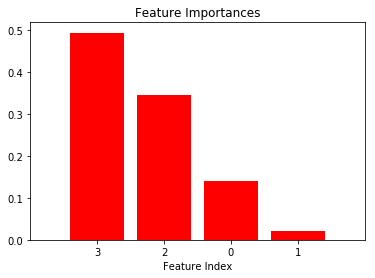

In [14]:
importances=r.feature_importances_
print(importances)


#index sorting
indices=np.argsort(importances)[::-1]
import matplotlib.pyplot as plt
#print the feature ranking
print("Feature Ranking: ")
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" %(f+1,indices[f]+1,importances[indices[f]]))
    

plt.figure()
plt.title("Feature Importances")
plt.bar(range(x.shape[1]),importances[indices], color="Red",align="center")
plt.xticks(range(x.shape[1]),indices) #x aixs values 
plt.xlabel("Feature Index")
plt.xlim([-1,x.shape[1]]) # x axix limit
plt.show()